# Water Quality Analysis Data

**Submitted By: GROUP 9**

Anisha Siwas-025007

Sarthak Jain-025029

Tanya Goel-025034

**Dataset Information: Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This dataset contains water quality metrics for 3276 different water bodies.**

1. ph: pH of 1. water (0 to 14).

2. Hardness: Capacity of water to precipitate soap in mg/L.

3. Solids: Total dissolved solids in ppm.

4. Chloramines: Amount of Chloramines in ppm.

5. Sulfate: Amount of Sulfates dissolved in mg/L.

6. Conductivity: Electrical conductivity of water in μS/cm.

7. Organic_carbon: Amount of organic carbon in ppm.

8. Trihalomethanes: Amount of Trihalomethanes in μg/L.

9. Turbidity: Measure of light emiting property of water in NTU.

10. Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

# IMPORTING LIBRARIES

In [1]:
# Data manipulation and plotting modules
import numpy as np
import pandas as pd
from collections import Counter

# Data pre-processing
# z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction
from sklearn.decomposition import PCA

# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling modules
from xgboost.sklearn import XGBClassifier

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import missingno as msno
import plotly.figure_factory as ff
from xgboost import plot_importance

# Needed for Bayes optimization
# Takes an estimator, performs cross-validation and gives out average score
from sklearn.model_selection import cross_val_score

# Misc
import time
import os
import gc
import random

# Used in Randomized parameter search
from scipy.stats import uniform

## DATA READING AND EXPLORATION

In [2]:
data = pd.read_csv("C:\\Users\\Tanya\\Downloads\\water_potability.csv")

Checking for shape of dataset. This dataset contains 3276 rows and 10 columns.

In [3]:
data.shape

(3276, 10)

Checking first 5 rows in dataset and getting an overview of what is dataset all about and what all columns are there.

In [4]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

Checking how many unique values are there in each column.

In [5]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

Describing the dataset. Calculating mean, standard deviation etc. for each column.

In [6]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Checking wheather dataset is balanced or not. Classes are not unbalanced.

In [7]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

Checking for data types of each feature.

In [8]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

Checking the data for null values.

In [9]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

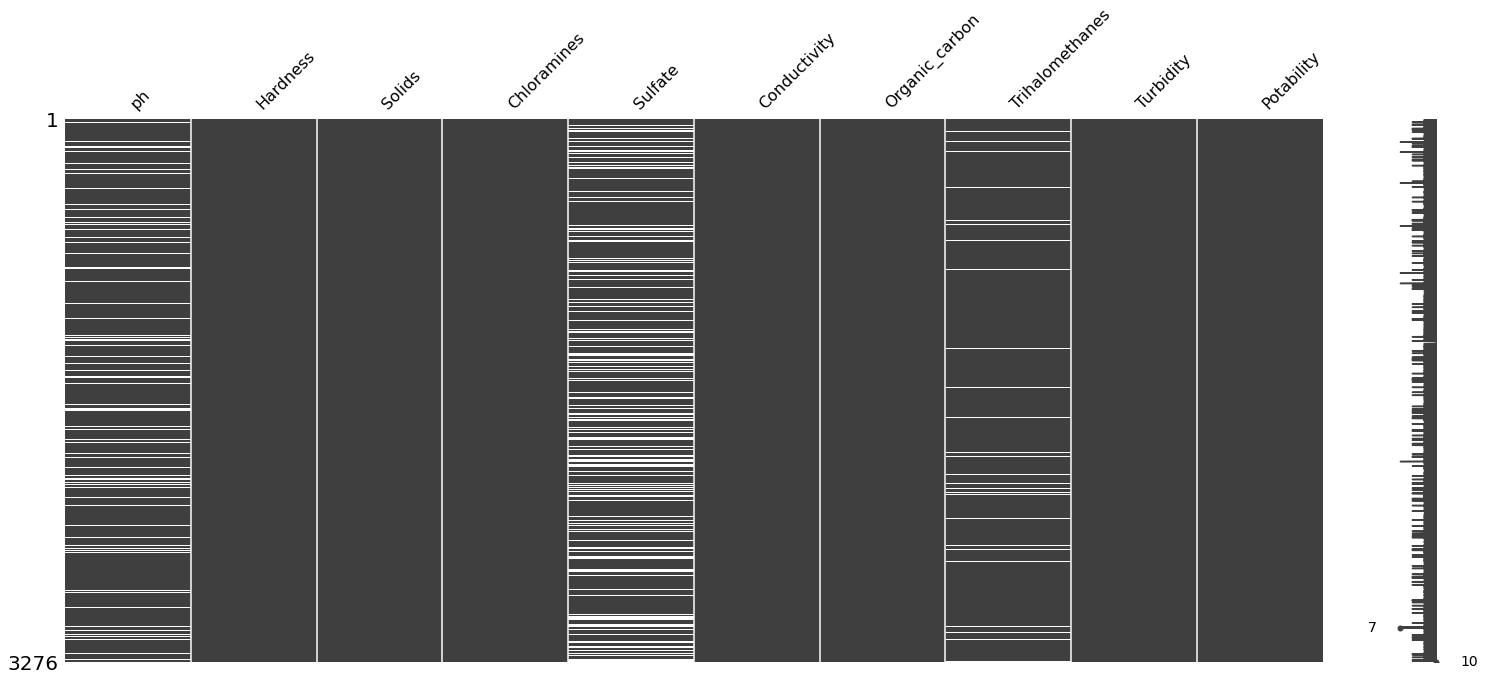

In [10]:
msno.matrix(data)
plt.show()

As our dataset contains many null values in 3 different columns therefore we will fill these null values with either mean or median of those particular columns. We can not drop these rows as null values are many. We will fill null values by mean when there are no outliers and median when there are outliers.

<AxesSubplot:xlabel='Potability', ylabel='ph'>

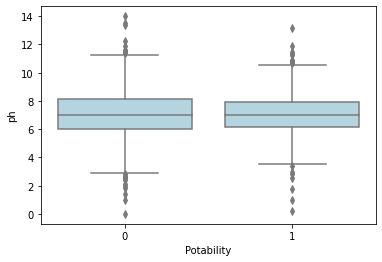

In [11]:
sns.boxplot(x = 'Potability',      
            y = 'ph',               
            data = data,
            color = 'lightblue'
            )

In [12]:
data.fillna(data['ph'].mean(), inplace = True)

<AxesSubplot:xlabel='Potability', ylabel='Sulfate'>

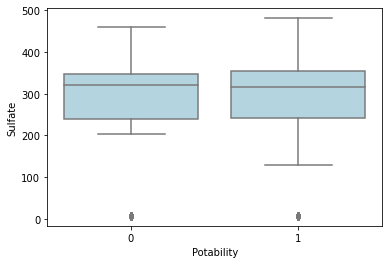

In [13]:
import seaborn as sns
sns.boxplot(x = 'Potability',      
            y = 'Sulfate',               
            data = data,
            color = 'lightblue'
            )

In [14]:
data.fillna(data['Sulfate'].median(), inplace = True)

<AxesSubplot:xlabel='Potability', ylabel='Trihalomethanes'>

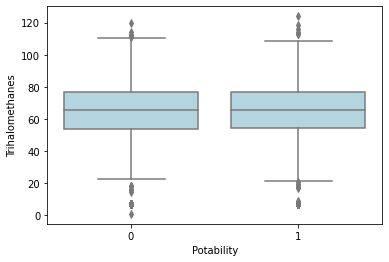

In [15]:
sns.boxplot(x = 'Potability',      
            y = 'Trihalomethanes',               
            data = data,
            color = 'lightblue'
            )

In [16]:
data.fillna(data['Trihalomethanes'].mean(), inplace = True)

## DATA VISUALIZATION

In [17]:
d = pd.DataFrame(data["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

<AxesSubplot:xlabel='ph', ylabel='Sulfate'>

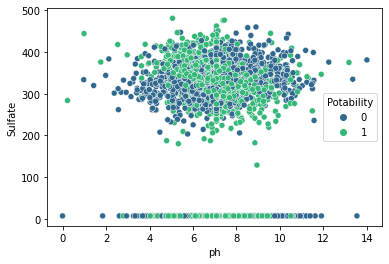

In [18]:
sns.scatterplot(data = data, x = "ph",y = "Sulfate",hue="Potability",palette="viridis")

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Sulfate'>

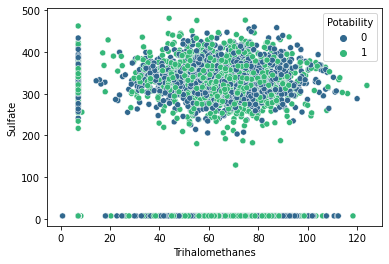

In [19]:
sns.scatterplot(data = data, x = "Trihalomethanes",y = "Sulfate",hue="Potability",palette="viridis")

<AxesSubplot:xlabel='ph', ylabel='Trihalomethanes'>

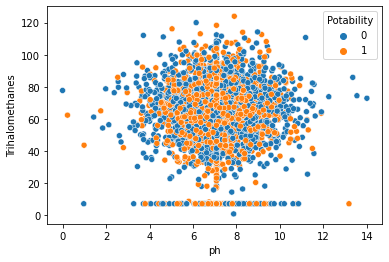

In [20]:
sns.scatterplot(data = data,x='ph',y="Trihalomethanes",hue="Potability")

In [21]:
positive = data[data['Potability'] == 1]

In [22]:
negative = data[data['Potability'] == 0]

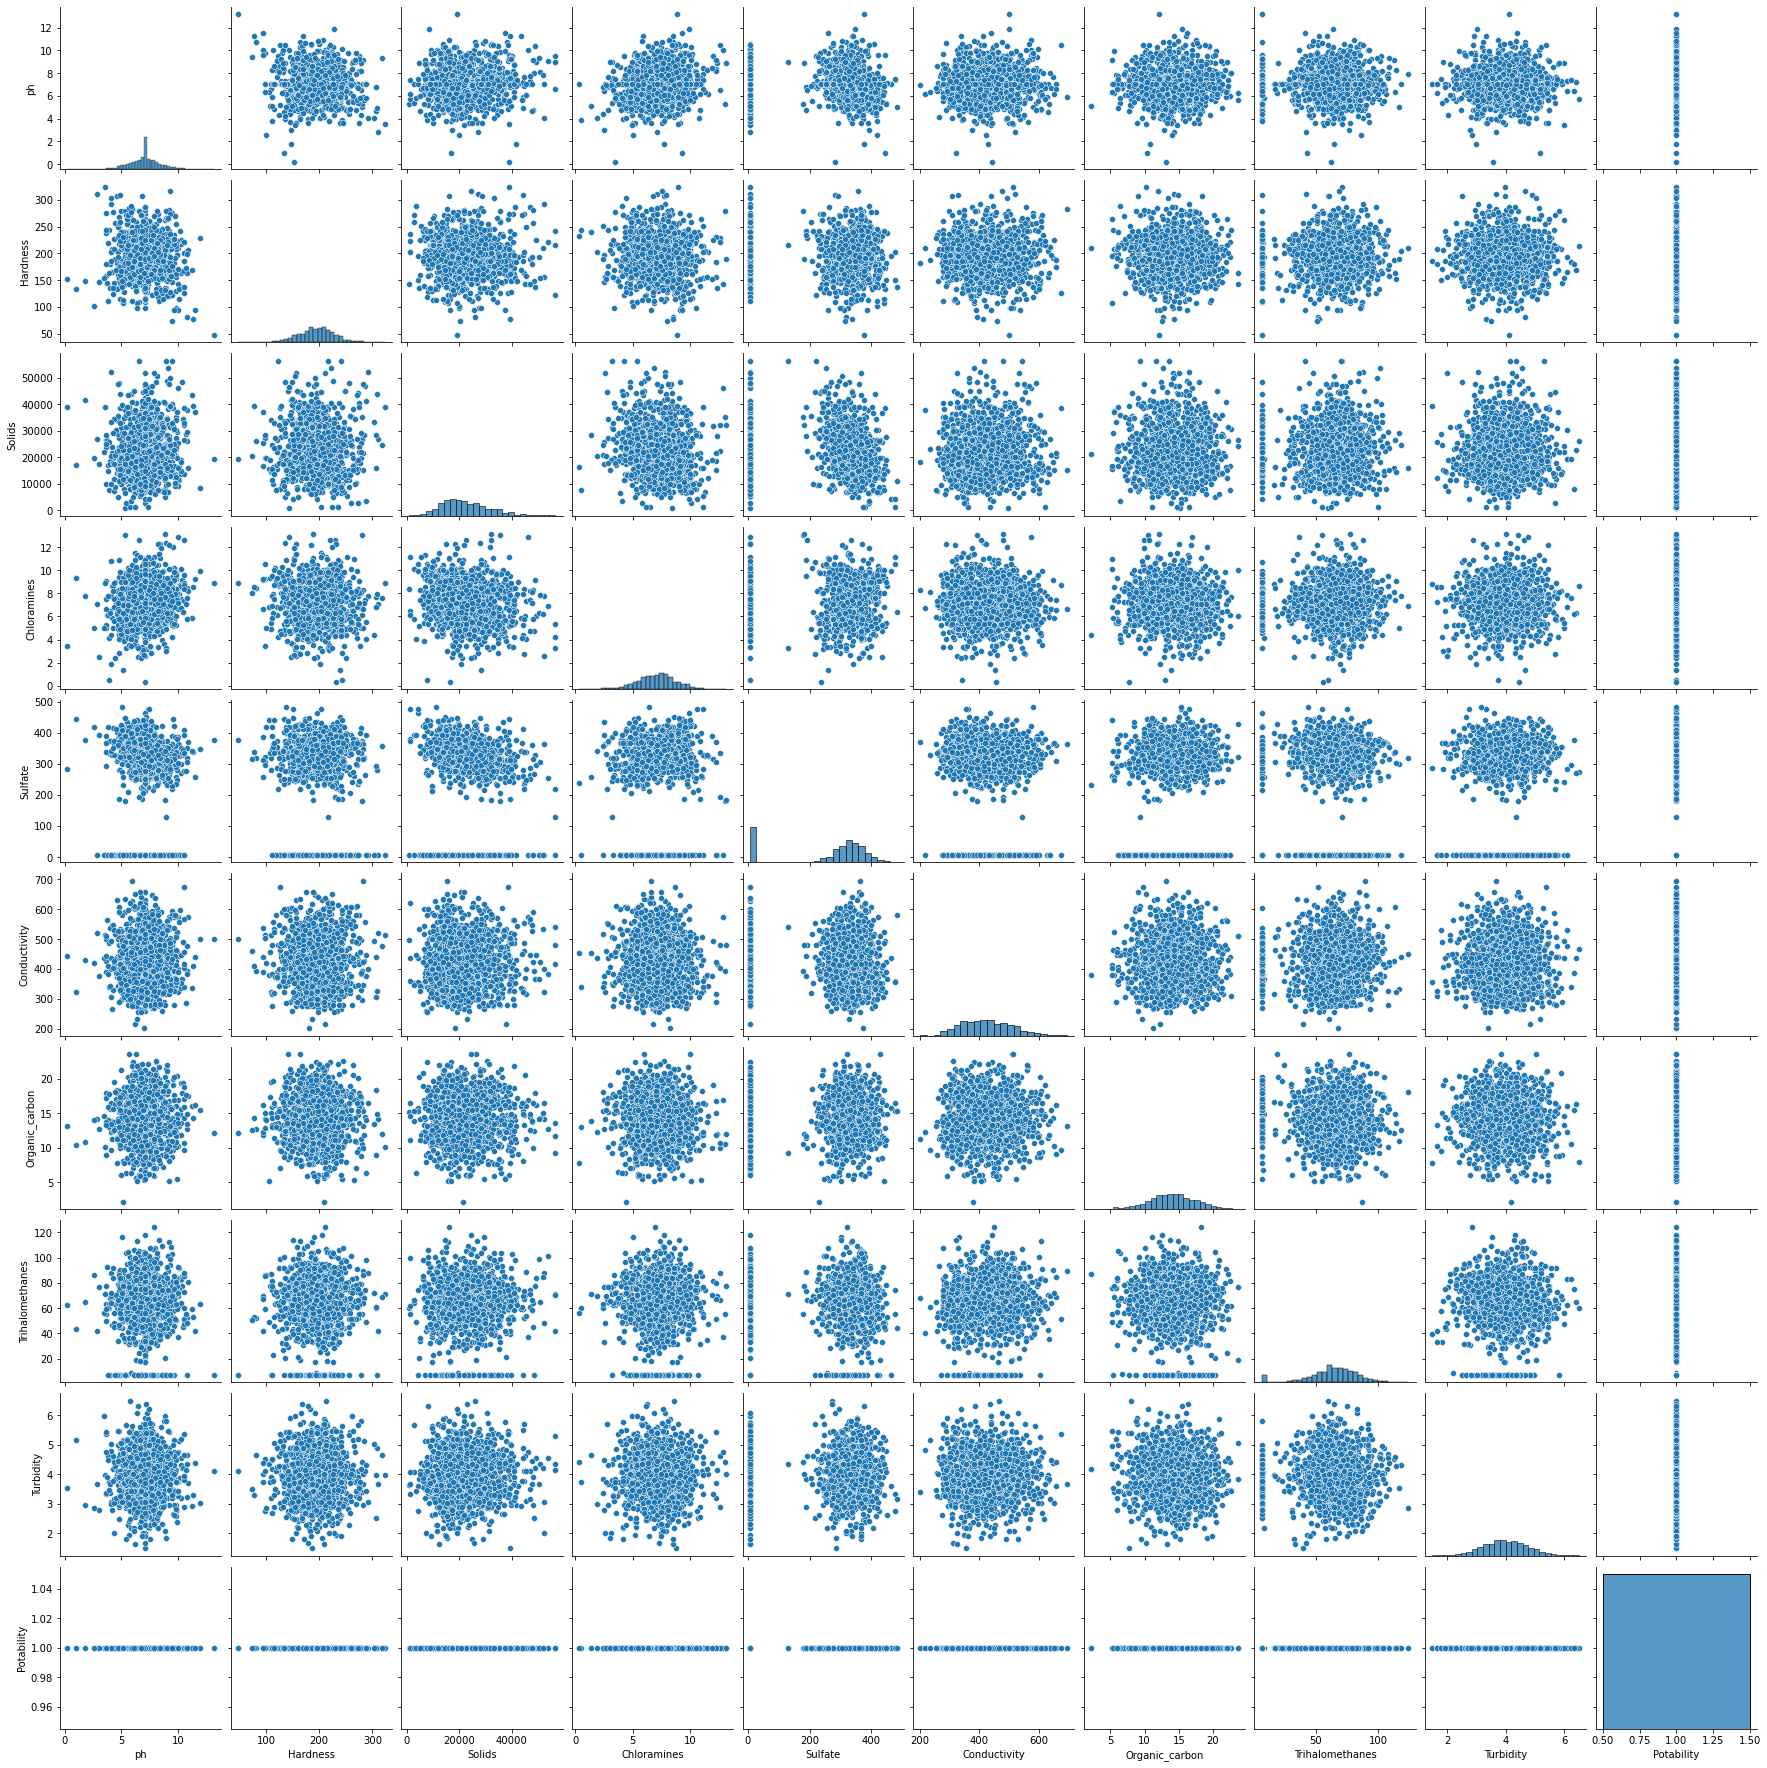

In [23]:
sns.pairplot(positive);

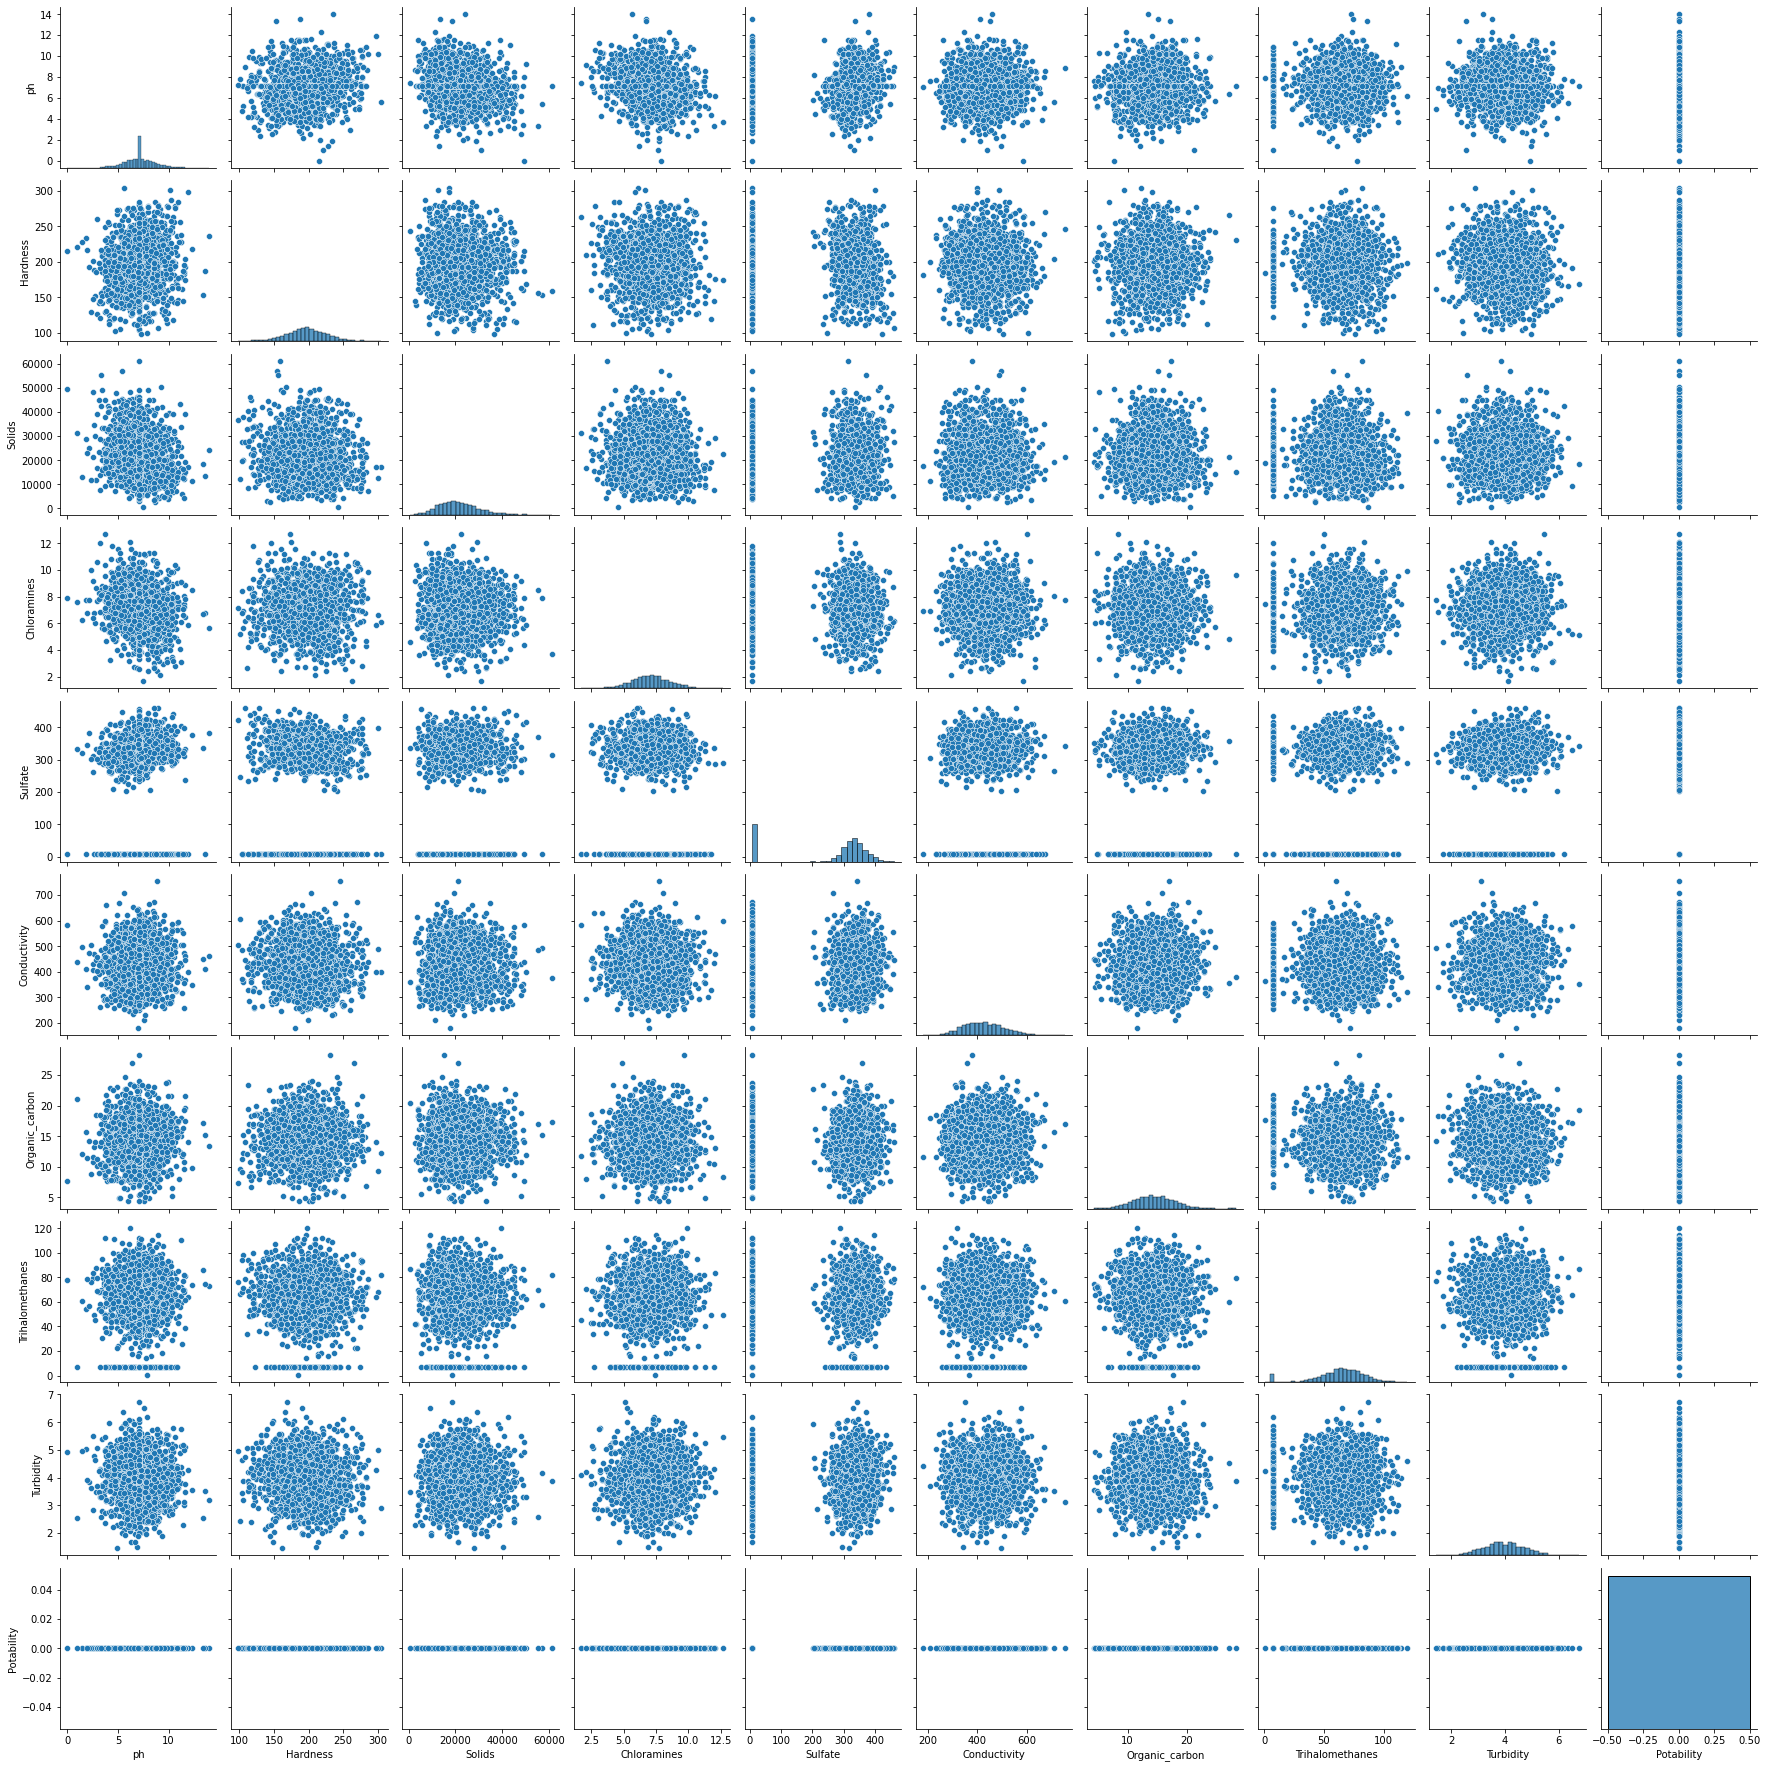

In [24]:
sns.pairplot(negative);

<AxesSubplot:>

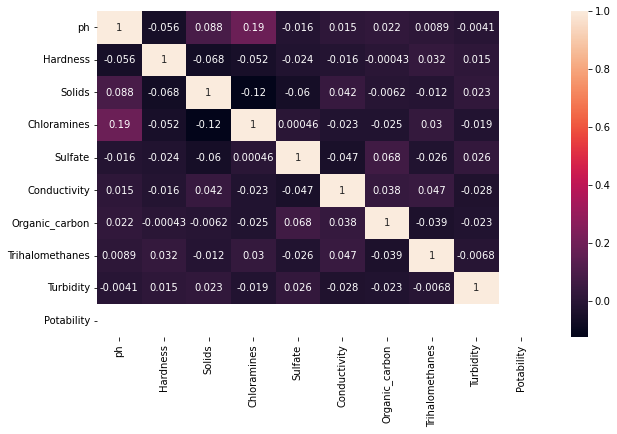

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(positive.corr(),annot=True)

<AxesSubplot:>

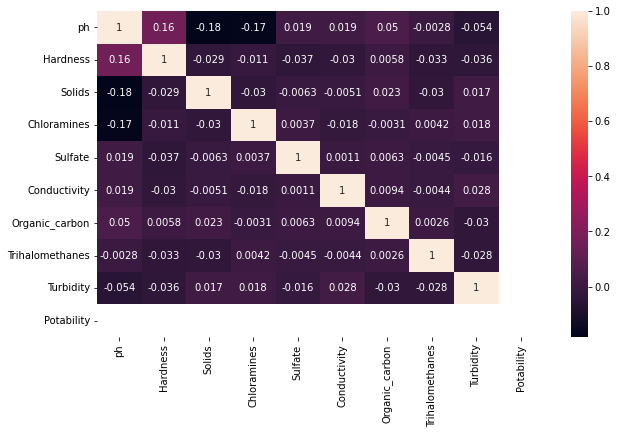

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(negative.corr(),annot=True)

## FEATURE ENGINEERING

We categorised the ph level column into three categories. Here we are using qcut in order to have equal count of data in all the three bins named l=low, m=medium and h=high.

In [27]:
data["ph_cat"] = pd.qcut(
                     data['ph'],
                     q = 3,
                     labels= ["l", "m", "h"]
                     )

In [28]:
data.ph_cat.value_counts()

l    1092
m    1092
h    1092
Name: ph_cat, dtype: int64

After categorising the ph levels, we plotted it graphically to check the ratio of potability to non potability with respect to ph levels.

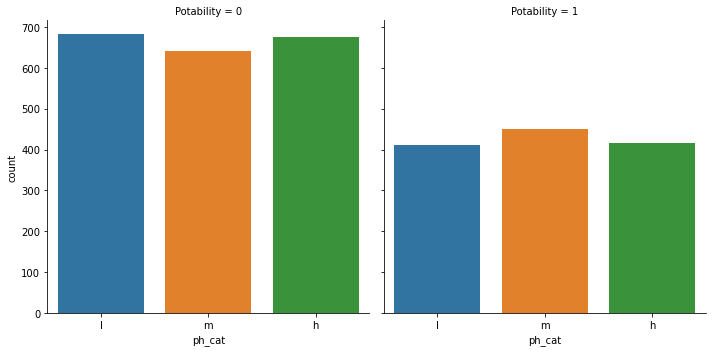

In [29]:
sns.catplot(x='ph_cat',col='Potability',kind='count',data=data)

Renaming columns.

In [30]:
new_col_name= {
               'Trihalomethanes': 'THM',
               'Organic_carbon': 'Org_CO2'
              }

In [31]:
data.rename(
         columns = new_col_name,
         inplace = True,
         )

In [32]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    7.080795   
2     8.099124  224.236259  19909.541732     9.275884    7.080795   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    7.080795   
3273  9.419510  175.762646  33155.578218     7.350233    7.080795   
3274  5.126763  230.603758  11983.869376     6.303357    7.080795   
3275  7.874671  195.102299  17404.177061     7.509306    7.080795   

      Conductivity    Org_CO2         THM  Turbidity  Potability ph_cat  
0       564.308654  10.379783   86.990970   2.963135           0      m  
1       592.885359  15.180013   56.329076   4.500656           0      l  
2       418.606213  16.868637   66.420093   3.055934           0      h  
3       363.266516  18.436524  100.341674   4.628771           0      h  
4       398.410813  11.558279   31.997993   4.075075           0      h  
...            ...        ...         ...        ...         ...    ...  
3271    526.424171  13.894419   66.687695   4.435821           1      l  
3272    392.449580  19.903225    7.080795   2.798243           1      h  
3273    432.044783  11.039070   69.845400   3.298875           1      h  
3274    402.883113  11.168946   77.488213   4.708658           1      l  
3275    327.459760  16.140368   78.698446   2.309149           1      h  

[3276 rows x 11 columns]

## DICOVERING STRUCTURE

In [33]:
# Data preprocessing
# Scaling data in various manner
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import make_pipeline

## Manifolds
from sklearn.manifold import TSNE

from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import log_loss

## G: Others
# Misc/visualization
import os, time, gc
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    7.080795   
2     8.099124  224.236259  19909.541732     9.275884    7.080795   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    7.080795   
3273  9.419510  175.762646  33155.578218     7.350233    7.080795   
3274  5.126763  230.603758  11983.869376     6.303357    7.080795   
3275  7.874671  195.102299  17404.177061     7.509306    7.080795   

      Conductivity    Org_CO2         THM  Turbidity  Potability ph_cat  
0       564.308654  10.379783   86.990970   2.963135           0      m  
1       592.885359  15.180013   56.329076   4.500656           0      l  
2       418.606213  16.868637   66.420093   3.055934           0      h  
3       363.266516  18.436524  100.341674   4.628771           0      h  
4       398.410813  11.558279   31.997993   4.075075           0      h  
...            ...        ...         ...        ...         ...    ...  
3271    526.424171  13.894419   66.687695   4.435821           1      l  
3272    392.449580  19.903225    7.080795   2.798243           1      h  
3273    432.044783  11.039070   69.845400   3.298875           1      h  
3274    402.883113  11.168946   77.488213   4.708658           1      l  
3275    327.459760  16.140368   78.698446   2.309149           1      h  

[3276 rows x 11 columns]

In [35]:
data.drop(labels='ph_cat', axis=1, inplace=True)

In [36]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    7.080795   
2     8.099124  224.236259  19909.541732     9.275884    7.080795   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    7.080795   
3273  9.419510  175.762646  33155.578218     7.350233    7.080795   
3274  5.126763  230.603758  11983.869376     6.303357    7.080795   
3275  7.874671  195.102299  17404.177061     7.509306    7.080795   

      Conductivity    Org_CO2         THM  Turbidity  Potability  
0       564.308654  10.379783   86.990970   2.963135           0  
1       592.885359  15.180013   56.329076   4.500656           0  
2       418.606213  16.868637   66.420093   3.055934           0  
3       363.266516  18.436524  100.341674   4.628771           0  
4       398.410813  11.558279   31.997993   4.075075           0  
...            ...        ...         ...        ...         ...  
3271    526.424171  13.894419   66.687695   4.435821           1  
3272    392.449580  19.903225    7.080795   2.798243           1  
3273    432.044783  11.039070   69.845400   3.298875           1  
3274    402.883113  11.168946   77.488213   4.708658           1  
3275    327.459760  16.140368   78.698446   2.309149           1  

[3276 rows x 10 columns]

## USING t-SNE DIMENTIONALITY REDUCTION TO DISCOVER IF DATA POSSESS ANY STRUCTURE

Popping out the target variable in order to separate predictors and target.

In [37]:
y = data.pop("Potability")

In [38]:
X = data  
X.shape

(3276, 9)

Splitting the dataset into train and validation parts. Here we have splitted our dataset in such a manner that 80% of the dataset will be used for training the model and other 20% of the dataset will be used to test the model.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

In [40]:
f"X_train shape: {X_train.shape}"   
print(X_train.shape)
f"X_test.shape : {X_test.shape}"     
print(X_test.shape)
f"y_train shape: {y_train.shape}"    
print(y_train.shape)
f"y_test shape : {y_test.shape}"  
print(y_test.shape)

(2620, 9)
(656, 9)
(2620,)
(656,)


Visualising through t-SNE

In [41]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=30, n_iter=300).fit_transform(data)

Wall time: 0 ns


C:\Users\Tanya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Tanya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



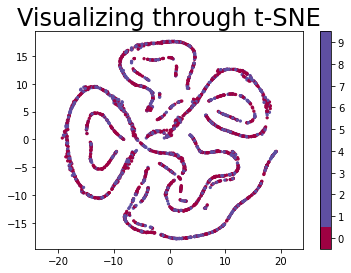

In [42]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing through t-SNE', fontsize=24);

Visualising through t-SNE in 3D

In [43]:
%time
pca_tsne2 = TSNE(random_state = 42, n_components=3, verbose=0, perplexity=40, n_iter=300).fit_transform(tsne)

Wall time: 0 ns


C:\Users\Tanya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Tanya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



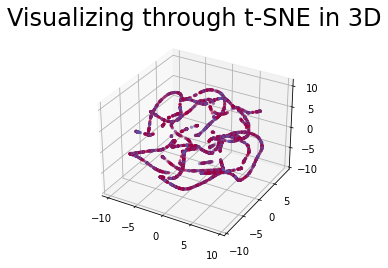

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 5, c=y, cmap='Spectral')
plt.title('Visualizing through t-SNE in 3D', fontsize=24);
plt.show()

## DATA PIPELINING

In [45]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    7.080795   
2     8.099124  224.236259  19909.541732     9.275884    7.080795   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    7.080795   
3273  9.419510  175.762646  33155.578218     7.350233    7.080795   
3274  5.126763  230.603758  11983.869376     6.303357    7.080795   
3275  7.874671  195.102299  17404.177061     7.509306    7.080795   

      Conductivity    Org_CO2         THM  Turbidity  
0       564.308654  10.379783   86.990970   2.963135  
1       592.885359  15.180013   56.329076   4.500656  
2       418.606213  16.868637   66.420093   3.055934  
3       363.266516  18.436524  100.341674   4.628771  
4       398.410813  11.558279   31.997993   4.075075  
...            ...        ...         ...        ...  
3271    526.424171  13.894419   66.687695   4.435821  
3272    392.449580  19.903225    7.080795   2.798243  
3273    432.044783  11.039070   69.845400   3.298875  
3274    402.883113  11.168946   77.488213   4.708658  
3275    327.459760  16.140368   78.698446   2.309149  

[3276 rows x 9 columns]

Now we will be separating out categorical and numerical features.

In [46]:
print("\n--Unique values in each column")
X_train.nunique()        # Total no of unique values in each column

# If no. of unique values less than 5, it is categorical
print("\n\n--All 'True' are Categorical----")
X_train.nunique() < 5    # All True are categorical


--Unique values in each column


--All 'True' are Categorical----


ph              False
Hardness        False
Solids          False
Chloramines     False
Sulfate         False
Conductivity    False
Org_CO2         False
THM             False
Turbidity       False
dtype: bool

No categorical feature in training dataset.

We will create two subsets of num_cols, One set we will impute using 'mean' and the other using 'median'.

In [47]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Org_CO2', 'THM', 'Turbidity'],
      dtype='object')

After seeing outliers for all the columns we can say that numericals columns for which we will be using strategy as mean are the features which has very less or no outliers i.e, Conductivity, Organic_carbon and Turbidity, for the features that has more outliers we will be using median strategy i.e, ph, Hardness, Solids, Chloramines, Sulfate and Trihalomethanes.

In [48]:
num_cols_median = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'THM']

In [49]:
num_cols_mean = [ 'Conductivity', 'Org_CO2', 'Turbidity']

## CREATING PIPES

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Instantiating pipeline object for processing numerical data. Impute = median.

In [51]:
pipe1    = Pipeline(
                     [
                      ('sm', SimpleImputer(strategy='median')),
                      ('ss2', StandardScaler())
                     ]
                  )

Instantiating pipeline object for processing numerical data. Impute = mean.

In [52]:
pipe2    = Pipeline(
                     [
                      ('sm', SimpleImputer(strategy='mean')),
                      ('ss2', StandardScaler())
                     ]
                  )

## TESTING THE PIPES

Feeding data to each pipe to see if it is working.

In [53]:
pipe1.fit_transform(X_train[num_cols_median])
pipe2.fit_transform(X_train[num_cols_mean])

array([[-1.25764189,  0.01412794, -0.03973293],
       [-0.02294607,  0.03743491,  0.61983155],
       [-1.1191766 ,  0.43664507, -0.2977215 ],
       ...,
       [ 1.05733534,  0.38226338,  1.18307555],
       [ 0.38799543,  0.89780282,  1.07739936],
       [ 0.03214472,  0.37781073,  1.09141927]])

## GATHERING THE PIPES INTO COLUMN TRANSFORMER 

Collecting all pipes in column transformer along the column names. All pipes operate parallely.

In [54]:
#  (some-name,  transformer,   col-names)
ct_transformer = ColumnTransformer(
                                    [
                                      ('p_median',   pipe1,   num_cols_median),
                                     
                                      ('p_mean',  pipe2,   num_cols_mean)
                                   
                                    ]
                                  )

## TESTING THE COLUMN TRANSFORMER

In [55]:
ct_transformer.fit_transform(X_train)

array([[-0.76985787,  0.80702582, -0.45140184, ..., -1.25764189,
         0.01412794, -0.03973293],
       [-0.53517095, -1.09481728, -0.56144896, ..., -0.02294607,
         0.03743491,  0.61983155],
       [-1.15466299,  1.64953893, -0.68916367, ..., -1.1191766 ,
         0.43664507, -0.2977215 ],
       ...,
       [-0.03614434, -0.79637648, -0.21140406, ...,  1.05733534,
         0.38226338,  1.18307555],
       [ 0.21462202, -0.20520976,  0.80811446, ...,  0.38799543,
         0.89780282,  1.07739936],
       [ 0.86109353,  0.1776703 , -0.08314022, ...,  0.03214472,
         0.37781073,  1.09141927]])

Final Pipeline for transformation and modeling.

In [56]:
outer_pipe = Pipeline(
                      [
                       ('ct', ct_transformer),        # Column transformer object
                       ('dt', DecisionTreeClassifier()) # Estimator
                      ]
                     )

Train on data using final pipe.

In [57]:
outer_pipe.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_median',
                                                  Pipeline(steps=[('sm',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss2',
                                                                   StandardScaler())]),
                                                  ['ph', 'Hardness', 'Solids',
                                                   'Chloramines', 'Sulfate',
                                                   'THM']),
                                                 ('p_mean',
                                                  Pipeline(steps=[('sm',
                                                                   SimpleImputer()),
                                                                  ('ss2',
                                                                   StandardScaler())]),
                                                  ['Conductivity', 'Org_CO2',
                                                   'Turbidity'])])),
                ('dt', DecisionTreeClassifier())])

Making prediction on test data. Here we do not need to transform X_test separately as pipes take care of that.

In [58]:
outer_pipe.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

Transforming y_test

In [59]:
y_test

1343    0
3128    1
215     0
1051    0
1763    0
       ..
2771    1
827     0
1866    0
848     0
2334    1
Name: Potability, Length: 656, dtype: int64

Display pipeline as diagram.

In [60]:
from sklearn import set_config
set_config(display='diagram')
outer_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_median',
                                                  Pipeline(steps=[('sm',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss2',
                                                                   StandardScaler())]),
                                                  ['ph', 'Hardness', 'Solids',
                                                   'Chloramines', 'Sulfate',
                                                   'THM']),
                                                 ('p_mean',
                                                  Pipeline(steps=[('sm',
                                                                   SimpleImputer()),
                                                                  ('ss2',
                                                                   StandardScaler())]),
                                                  ['Conductivity', 'Org_CO2',
                                                   'Turbidity'])])),
                ('dt', DecisionTreeClassifier())])

Pipeline as text.

In [61]:
set_config(display='text')
outer_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_median',
                                                  Pipeline(steps=[('sm',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss2',
                                                                   StandardScaler())]),
                                                  ['ph', 'Hardness', 'Solids',
                                                   'Chloramines', 'Sulfate',
                                                   'THM']),
                                                 ('p_mean',
                                                  Pipeline(steps=[('sm',
                                                                   SimpleImputer()),
                                                                  ('ss2',
                                                                   Sta

# HYPERPARAMETER TUNING

In [62]:
# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling module
from xgboost.sklearn import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# Plotting Modules
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Permutation feature importance
from sklearn.inspection import permutation_importance

# Parameters in the pipe that are available for tuning

print("\n\n--Which parameters can be tuned?--\n\n")
outer_pipe.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('ct', ColumnTransformer(transformers=[('p_median',
                                    Pipeline(steps=[('sm',
                                                     SimpleImputer(strategy='median')),
                                                    ('ss2', StandardScaler())]),
                                    ['ph', 'Hardness', 'Solids', 'Chloramines',
                                     'Sulfate', 'THM']),
                                   ('p_mean',
                                    Pipeline(steps=[('sm', SimpleImputer()),
                                                    ('ss2', StandardScaler())]),
                                    ['Conductivity', 'Org_CO2', 'Turbidity'])])),
  ('dt', DecisionTreeClassifier())],
 'verbose': False,
 'ct': ColumnTransformer(transformers=[('p_median',
                                  Pipeline(steps=[('sm',
                                                   SimpleImputer(strategy='median')),
                  

In [63]:
# Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], 
              'xg__n_estimators':   [200,  300],  
              'xg__max_depth':      [4,6],
              'pca__n_components' : [2,9],
              'xg__booster': ['gbtree','gblinear']
              }    

In [64]:
# Define revised dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05],
               'xg__max_depth':      [4,6],
              'pca__n_components' : [2,9],
               }  

In [65]:
steps_xg = [('sts', StandardScaler() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

In [66]:
pipe_xg = Pipeline(steps_xg)

In [67]:
clf = GridSearchCV(pipe_xg,         # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters? Those which maximise auc
                   )

In [68]:
# Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60  



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[16:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.





0.08598260482152303

In [69]:
# Best Score
f"Best score: {clf.best_score_} "           

# Best parameter set
print()
f"Best parameter set {clf.best_params_}"

"Best parameter set {'pca__n_components': 9, 'xg__learning_rate': 0.05, 'xg__max_depth': 4}"

--Few predictions--



--Accuracy Score--



--Confusion Matrix--



--F1 Score pos-label: 1--



--F1 Score pos-label: 0--



--ROC curve--



C:\Users\Tanya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



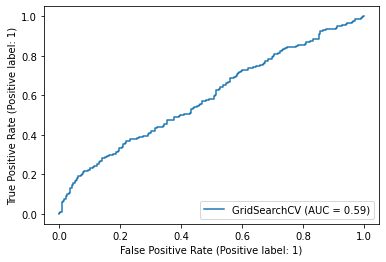

In [70]:
# Make predictions using the best returned model
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             

# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)      

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)      

# ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

In [71]:
# Get feature importances from GridSearchCV best fitted 'xg' model

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



---Feature importances---



array([0.13497706, 0.09280669, 0.09942748, 0.11859372, 0.10764997,
       0.10221832, 0.0960126 , 0.11664394, 0.13167018], dtype=float32)

In [72]:
# Store column names somewhere for use in feature importance

colnames = X.columns.tolist()

In [73]:
# Create a dataframe of feature importances with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

df_imp

imp
Hardness      0.092807
Org_CO2       0.096013
Solids        0.099427
Conductivity  0.102218
Sulfate       0.107650
THM           0.116644
Chloramines   0.118594
Turbidity     0.131670
ph            0.134977

In [74]:
# First five columns with least feature importance are:

list(df_imp.index.values[:5])

['Hardness', 'Org_CO2', 'Solids', 'Conductivity', 'Sulfate']